In [257]:
# Import Dependencies 
%matplotlib notebook
import pandas as pd
import numpy as np
import statsmodels.formula.api as stata
import matplotlib.pyplot as plt


In [258]:
# Save original data as a variable to be read 
original_data = "original_dataset.csv"


In [259]:
# Read our Data file with the pandas library
original_data_df = pd.read_csv(original_data)
original_data_df.head()



,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v013_rawvalue,v016_rawvalue,v017_rawvalue,v025_rawvalue,v026_rawvalue,v027_rawvalue,v031_rawvalue,v032_rawvalue,v035_rawvalue,v097_rawvalue
0,0,0,0,US,United States,2019,NaN,6900.630354,3745538.0,908266078.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1000,AL,Alabama,2019,NaN,9917.232898,80440.0,13636816.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,1001,AL,Autauga County,2019,1.0,8824.057123,815.0,156132.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,1003,AL,Baldwin County,2019,1.0,7224.632160,2827.0,576496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,1005,AL,Barbour County,2019,1.0,9586.165037,451.0,72222.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
# Pull columns which will be needed for future analysis

new_data = original_data_df[["state", "year", "v023_numerator", "v023_denominator", "v085_numerator", "v085_denominator", "v003_numerator", "v003_denominator", "v122_numerator", "v122_denominator", "v060_numerator", "v060_denominator", "v061_numerator", "v061_denominator", "v011_numerator", "v011_denominator", "v043_numerator", "v043_denominator", "v135_numerator", "v135_denominator", "v015_numerator", "v015_denominator", "v148_numerator", "v148_denominator", "v138_numerator", "v138_denominator", "v001_numerator", "v001_denominator", "v037_numerator", "v037_denominator"]]
new_data.head()

,state,year,v023_numerator,v023_denominator,v085_numerator,v085_denominator,v003_numerator,v003_denominator,v122_numerator,v122_denominator,...,v015_numerator,v015_denominator,v148_numerator,v148_denominator,v138_numerator,v138_denominator,v001_numerator,v001_denominator,v037_numerator,v037_denominator
0,US,2019,6994555.0,160588786.0,26749668.0,267259921.0,23533400.0,194808251.0,3559597.0,76219054.0,...,119838.0,2.230757e+09,181907.0,1.605251e+09,186273.0,970265511.0,3745538.0,908266078.0,2230947.0,27579119.0
1,AL,2019,95342.0,2168448.0,427972.0,3973078.0,401044.0,2895627.0,30253.0,1135031.0,...,3196.0,3.390489e+07,4803.0,2.428012e+07,2327.0,14597026.0,80440.0,13636816.0,41895.0,412942.0
2,AL,2019,1001.0,25909.0,4002.0,47077.0,3686.0,33628.0,351.0,14175.0,...,20.0,3.876890e+05,49.0,2.769080e+05,16.0,166267.0,815.0,156132.0,377.0,4448.0
3,AL,2019,3652.0,91567.0,17733.0,165740.0,16389.0,120771.0,1530.0,47251.0,...,40.0,1.398058e+06,147.0,1.020551e+06,102.0,624900.0,2827.0,576496.0,1299.0,15578.0
4,AL,2019,486.0,8236.0,2252.0,17997.0,2105.0,12725.0,161.0,5549.0,...,13.0,1.860070e+05,20.0,1.316870e+05,NaN,NaN,451.0,72222.0,215.0,1963.0


In [261]:
# Renamed Columns
renamed_new = new_data.rename(columns={"state" :"State", 
                                       "year" :"Year", 
                                       "v023_numerator": "Unemployment_Num", 
                                       "v023_denominator":"Unemployment_Den", 
                                       "v085_numerator": "Uninsured_Num", 
                                       "v085_denominator":"Uninsured_Den", 
                                       "v003_numerator": "Uninsured_Adults_Num", 
                                       "v003_denominator": "Uninsured_Adults_Den", 
                                       "v122_numerator": "Uninsured_Children_Num", 
                                       "v122_denominator": "Uninsured_Children_Den", 
                                       "v060_numerator": "Diabetes_Prevalence_Num", 
                                       "v060_denominator":"Diabetes_Prevalence_Den", 
                                       "v061_numerator": "HIV_Prevalence_Num", 
                                       "v061_denominator": "HIV_Prevalence_Den",  
                                       "v011_numerator": "Adult_Obesity_Num", 
                                       "v011_denominator": "Adult_Obesity_Den",  
                                       "v043_numerator": "Violent_Crimes_Num", 
                                       "v043_denominator": "Violent_Crimes_Den", 
                                       "v135_numerator": "Injury_Deaths_Num", 
                                       "v135_denominator": "Injury_Deaths_Den", 
                                       "v015_numerator": "Homicides_Num", 
                                       "v015_denominator": "Homicides_Den", 
                                       "v148_numerator": "Firearms_Fatality_Num", 
                                       "v148_denominator": "Firearms_Fatality_Den", 
                                       "v138_numerator": "Drugs_Overdose_Death_Num", 
                                       "v138_denominator":"Drugs_Overdose_Death_Den", 
                                       "v001_numerator":"Premature_Deaths_Num", 
                                       "v001_denominator":"Premature_Deaths_Den", 
                                       "v037_numerator":"Low_Birth_Weight_Num", 
                                       "v037_denominator": "Low_Birth_Weight_Den"
})

renamed_new.head()

,State,Year,Unemployment_Num,Unemployment_Den,Uninsured_Num,Uninsured_Den,Uninsured_Adults_Num,Uninsured_Adults_Den,Uninsured_Children_Num,Uninsured_Children_Den,...,Homicides_Num,Homicides_Den,Firearms_Fatality_Num,Firearms_Fatality_Den,Drugs_Overdose_Death_Num,Drugs_Overdose_Death_Den,Premature_Deaths_Num,Premature_Deaths_Den,Low_Birth_Weight_Num,Low_Birth_Weight_Den
0,US,2019,6994555.0,160588786.0,26749668.0,267259921.0,23533400.0,194808251.0,3559597.0,76219054.0,...,119838.0,2.230757e+09,181907.0,1.605251e+09,186273.0,970265511.0,3745538.0,908266078.0,2230947.0,27579119.0
1,AL,2019,95342.0,2168448.0,427972.0,3973078.0,401044.0,2895627.0,30253.0,1135031.0,...,3196.0,3.390489e+07,4803.0,2.428012e+07,2327.0,14597026.0,80440.0,13636816.0,41895.0,412942.0
2,AL,2019,1001.0,25909.0,4002.0,47077.0,3686.0,33628.0,351.0,14175.0,...,20.0,3.876890e+05,49.0,2.769080e+05,16.0,166267.0,815.0,156132.0,377.0,4448.0
3,AL,2019,3652.0,91567.0,17733.0,165740.0,16389.0,120771.0,1530.0,47251.0,...,40.0,1.398058e+06,147.0,1.020551e+06,102.0,624900.0,2827.0,576496.0,1299.0,15578.0
4,AL,2019,486.0,8236.0,2252.0,17997.0,2105.0,12725.0,161.0,5549.0,...,13.0,1.860070e+05,20.0,1.316870e+05,NaN,NaN,451.0,72222.0,215.0,1963.0


In [262]:
# Dropping Row
drop_us = renamed_new.drop([0])
drop_us.head()

,State,Year,Unemployment_Num,Unemployment_Den,Uninsured_Num,Uninsured_Den,Uninsured_Adults_Num,Uninsured_Adults_Den,Uninsured_Children_Num,Uninsured_Children_Den,...,Homicides_Num,Homicides_Den,Firearms_Fatality_Num,Firearms_Fatality_Den,Drugs_Overdose_Death_Num,Drugs_Overdose_Death_Den,Premature_Deaths_Num,Premature_Deaths_Den,Low_Birth_Weight_Num,Low_Birth_Weight_Den
1,AL,2019,95342.0,2168448.0,427972.0,3973078.0,401044.0,2895627.0,30253.0,1135031.0,...,3196.0,33904888.0,4803.0,24280125.0,2327.0,14597026.0,80440.0,13636816.0,41895.0,412942.0
2,AL,2019,1001.0,25909.0,4002.0,47077.0,3686.0,33628.0,351.0,14175.0,...,20.0,387689.0,49.0,276908.0,16.0,166267.0,815.0,156132.0,377.0,4448.0
3,AL,2019,3652.0,91567.0,17733.0,165740.0,16389.0,120771.0,1530.0,47251.0,...,40.0,1398058.0,147.0,1020551.0,102.0,624900.0,2827.0,576496.0,1299.0,15578.0
4,AL,2019,486.0,8236.0,2252.0,17997.0,2105.0,12725.0,161.0,5549.0,...,13.0,186007.0,20.0,131687.0,NaN,NaN,451.0,72222.0,215.0,1963.0
5,AL,2019,373.0,8506.0,1646.0,17004.0,1532.0,12458.0,125.0,4772.0,...,13.0,158275.0,24.0,112912.0,15.0,67894.0,445.0,63653.0,202.0,1819.0


In [263]:
# Create a new dataframe 
updated_data = pd.DataFrame(data = drop_us)
updated_data.head()

,State,Year,Unemployment_Num,Unemployment_Den,Uninsured_Num,Uninsured_Den,Uninsured_Adults_Num,Uninsured_Adults_Den,Uninsured_Children_Num,Uninsured_Children_Den,...,Homicides_Num,Homicides_Den,Firearms_Fatality_Num,Firearms_Fatality_Den,Drugs_Overdose_Death_Num,Drugs_Overdose_Death_Den,Premature_Deaths_Num,Premature_Deaths_Den,Low_Birth_Weight_Num,Low_Birth_Weight_Den
1,AL,2019,95342.0,2168448.0,427972.0,3973078.0,401044.0,2895627.0,30253.0,1135031.0,...,3196.0,33904888.0,4803.0,24280125.0,2327.0,14597026.0,80440.0,13636816.0,41895.0,412942.0
2,AL,2019,1001.0,25909.0,4002.0,47077.0,3686.0,33628.0,351.0,14175.0,...,20.0,387689.0,49.0,276908.0,16.0,166267.0,815.0,156132.0,377.0,4448.0
3,AL,2019,3652.0,91567.0,17733.0,165740.0,16389.0,120771.0,1530.0,47251.0,...,40.0,1398058.0,147.0,1020551.0,102.0,624900.0,2827.0,576496.0,1299.0,15578.0
4,AL,2019,486.0,8236.0,2252.0,17997.0,2105.0,12725.0,161.0,5549.0,...,13.0,186007.0,20.0,131687.0,NaN,NaN,451.0,72222.0,215.0,1963.0
5,AL,2019,373.0,8506.0,1646.0,17004.0,1532.0,12458.0,125.0,4772.0,...,13.0,158275.0,24.0,112912.0,15.0,67894.0,445.0,63653.0,202.0,1819.0


In [264]:
Unemployment_Num = updated_data.groupby(["State"]).sum()["Unemployment_Num"]
Unemployment_Den = updated_data.groupby(["State"]).sum()["Unemployment_Den"]
Unemployment_Perc = Unemployment_Num / Unemployment_Den

Uninsured_Num = updated_data.groupby(["State"]).sum()["Uninsured_Num"]
Uninsured_Den = updated_data.groupby(["State"]).sum()["Uninsured_Den"]
Uninsured_Perc = Uninsured_Num / Uninsured_Den

Uninsured_Adults_Num = updated_data.groupby(["State"]).sum()["Uninsured_Adults_Num"]
Uninsured_Adults_Den = updated_data.groupby(["State"]).sum()["Uninsured_Adults_Den"]
Uninsured_Adults_Perc = Uninsured_Adults_Num / Uninsured_Adults_Den

Uninsured_Children_Num = updated_data.groupby(["State"]).sum()["Uninsured_Children_Num"]
Uninsured_Children_Den = updated_data.groupby(["State"]).sum()["Uninsured_Children_Den"]
Uninsured_Children_Perc = Uninsured_Children_Num / Uninsured_Children_Den

Diabetes_Prevalence_Num = updated_data.groupby(["State"]).sum()["Diabetes_Prevalence_Num"]
Diabetes_Prevalence_Den = updated_data.groupby(["State"]).sum()["Diabetes_Prevalence_Den"]
Diabetes_Prevalence_Perc = Diabetes_Prevalence_Num / Diabetes_Prevalence_Den

HIV_Prevalence_Num = updated_data.groupby(["State"]).sum()["HIV_Prevalence_Num"]
HIV_Prevalence_Den = updated_data.groupby(["State"]).sum()["HIV_Prevalence_Den"]
HIV_Prevalence_Perc = HIV_Prevalence_Num / HIV_Prevalence_Den


Adult_Obesity_Num = updated_data.groupby(["State"]).sum()["Adult_Obesity_Num"]
Adult_Obesity_Den = updated_data.groupby(["State"]).sum()["Adult_Obesity_Den"]
Adult_Obesity_Perc = Adult_Obesity_Num / Adult_Obesity_Den


Violent_Crimes_Num = updated_data.groupby(["State"]).sum()["Violent_Crimes_Num"]
Violent_Crimes_Den = updated_data.groupby(["State"]).sum()["Violent_Crimes_Den"]
Violent_Crimes_Perc = Violent_Crimes_Num / Violent_Crimes_Den

Injury_Deaths_Num = updated_data.groupby(["State"]).sum()["Injury_Deaths_Num"]
Injury_Deaths_Den = updated_data.groupby(["State"]).sum()["Injury_Deaths_Den"]
Injury_Deaths_Perc = Injury_Deaths_Num / Injury_Deaths_Den

Homicides_Num = updated_data.groupby(["State"]).sum()["Homicides_Num"]
Homicides_Den = updated_data.groupby(["State"]).sum()["Homicides_Den"]
Homicides_Perc = Homicides_Num / Homicides_Den

Firearms_Fatality_Num = updated_data.groupby(["State"]).sum()["Firearms_Fatality_Num"]
Firearms_Fatality_Den = updated_data.groupby(["State"]).sum()["Firearms_Fatality_Den"]
Firearms_Fatality_Perc = Firearms_Fatality_Num / Firearms_Fatality_Den


Drugs_Overdose_Death_Num = updated_data.groupby(["State"]).sum()["Drugs_Overdose_Death_Num"]
Drugs_Overdose_Death_Den = updated_data.groupby(["State"]).sum()["Drugs_Overdose_Death_Den"]
Drugs_Overdose_Death_Perc = Drugs_Overdose_Death_Num / Drugs_Overdose_Death_Den

Premature_Deaths_Num = updated_data.groupby(["State"]).sum()["Premature_Deaths_Num"]
Premature_Deaths_Den = updated_data.groupby(["State"]).sum()["Premature_Deaths_Den"]
Premature_Deaths_Perc = Premature_Deaths_Num / Premature_Deaths_Den

Low_Birth_Weight_Num = updated_data.groupby(["State"]).sum()["Low_Birth_Weight_Num"]
Low_Birth_Weight_Den = updated_data.groupby(["State"]).sum()["Low_Birth_Weight_Den"]
Low_Birth_Weight_Perc = Low_Birth_Weight_Num / Low_Birth_Weight_Den



In [265]:
data = [Unemployment_Num, 
        Unemployment_Den, 
        Unemployment_Perc, 
        Uninsured_Num, 
        Uninsured_Den, 
        Uninsured_Perc, 
        Uninsured_Adults_Num, 
        Uninsured_Adults_Den,
        Uninsured_Adults_Perc, 
        Uninsured_Children_Num, 
        Uninsured_Children_Den, 
        Uninsured_Children_Perc, 
        Diabetes_Prevalence_Num, 
        Diabetes_Prevalence_Den,
        Diabetes_Prevalence_Perc, 
        HIV_Prevalence_Num, 
        HIV_Prevalence_Den, 
        HIV_Prevalence_Perc, 
        Adult_Obesity_Num,
        Adult_Obesity_Den, 
        Adult_Obesity_Perc, 
        Violent_Crimes_Num, 
        Violent_Crimes_Den, 
        Violent_Crimes_Perc,
        Injury_Deaths_Num, 
        Injury_Deaths_Den, 
        Injury_Deaths_Perc, 
        Homicides_Num, 
        Homicides_Den, 
        Homicides_Perc, 
        Firearms_Fatality_Num,
        Firearms_Fatality_Den, 
        Firearms_Fatality_Perc, 
        Drugs_Overdose_Death_Num, 
        Drugs_Overdose_Death_Den,
        Drugs_Overdose_Death_Perc, 
        Premature_Deaths_Num, 
        Premature_Deaths_Den, 
        Premature_Deaths_Perc, 
        Low_Birth_Weight_Num,
        Low_Birth_Weight_Den, 
        Low_Birth_Weight_Perc]

state_df = pd.DataFrame (data)
state_df = state_df.transpose()
state_df.head()


,Unemployment_Num,Unemployment_Den,Unnamed 0,Uninsured_Num,Uninsured_Den,Unnamed 1,Uninsured_Adults_Num,Uninsured_Adults_Den,Unnamed 2,Uninsured_Children_Num,...,Unnamed 10,Drugs_Overdose_Death_Num,Drugs_Overdose_Death_Den,Unnamed 11,Premature_Deaths_Num,Premature_Deaths_Den,Unnamed 12,Low_Birth_Weight_Num,Low_Birth_Weight_Den,Unnamed 13
State,,,,,,,,,,,,,,,,,,,,,
AK,51956.0,725572.0,0.071607,201574.0,1299028.0,0.155173,163858.0,929122.0,0.176358,40588.0,...,0.000226,743.0,3995795.0,0.000186,16598.0,4269456.0,0.003888,9168.0,155451.0,0.058977
AL,190684.0,4336896.0,0.043968,855944.0,7946156.0,0.107718,802088.0,5791254.0,0.138500,60506.0,...,0.000198,4512.0,27416637.0,0.000165,160880.0,27273632.0,0.005899,83790.0,825884.0,0.101455
AR,99670.0,2708544.0,0.036798,456684.0,4855014.0,0.094064,403944.0,3474804.0,0.116249,58504.0,...,0.000180,2267.0,15808357.0,0.000143,95680.0,16718408.0,0.005723,47988.0,535980.0,0.089533
AZ,322628.0,6625442.0,0.048695,1339638.0,11226354.0,0.119330,1104656.0,8018912.0,0.137756,259282.0,...,0.000149,8370.0,41522215.0,0.000202,156792.0,38639850.0,0.004058,84784.0,1191676.0,0.071147
CA,1837766.0,38623920.0,0.047581,5574610.0,66523356.0,0.083799,5053256.0,48571872.0,0.104037,587374.0,...,0.000079,28335.0,235691015.0,0.000120,687182.0,222305892.0,0.003091,469061.0,6909720.0,0.067884


In [266]:
state_df.columns


Index(['Unemployment_Num', 'Unemployment_Den', 'Unnamed 0', 'Uninsured_Num',
       'Uninsured_Den', 'Unnamed 1', 'Uninsured_Adults_Num',
       'Uninsured_Adults_Den', 'Unnamed 2', 'Uninsured_Children_Num',
       'Uninsured_Children_Den', 'Unnamed 3', 'Diabetes_Prevalence_Num',
       'Diabetes_Prevalence_Den', 'Unnamed 4', 'HIV_Prevalence_Num',
       'HIV_Prevalence_Den', 'Unnamed 5', 'Adult_Obesity_Num',
       'Adult_Obesity_Den', 'Unnamed 6', 'Violent_Crimes_Num',
       'Violent_Crimes_Den', 'Unnamed 7', 'Injury_Deaths_Num',
       'Injury_Deaths_Den', 'Unnamed 8', 'Homicides_Num', 'Homicides_Den',
       'Unnamed 9', 'Firearms_Fatality_Num', 'Firearms_Fatality_Den',
       'Unnamed 10', 'Drugs_Overdose_Death_Num', 'Drugs_Overdose_Death_Den',
       'Unnamed 11', 'Premature_Deaths_Num', 'Premature_Deaths_Den',
       'Unnamed 12', 'Low_Birth_Weight_Num', 'Low_Birth_Weight_Den',
       'Unnamed 13'],
      dtype='object')

In [267]:
state = state_df.rename(index = str, columns = {
    "Unnamed 0" : "Percent Unemployed",
    "Unnamed 1" : "Percent Uninsured",
    "Unnamed 2" : "Percent of Adults Uninsured",
    "Unnamed 3" : "Percent of Children Uninsured",
    "Unnamed 4" : "Diabetes_Prevalence_Perc",
    "Unnamed 5" : "HIV_Prevalence_Perc",
    "Unnamed 6" : "Adult_Obesity_Perc",
    "Unnamed 7" : "Violent_Crimes_Perc",
    "Unnamed 8" : "Injury_Deaths_Perc",
    "Unnamed 9" : "Homicides_Perc",
    "Unnamed 10" : "Firearms_Fatalities_Perc",
    "Unnamed 11" : "Drugs_Overdose_Deaths_Perc",
    "Unnamed 12" : "Premature_Deaths_Perc",
    "Unnamed 13" : "Low_Birth_Weight_Perc",
})


state.head()


,Unemployment_Num,Unemployment_Den,Percent Unemployed,Uninsured_Num,Uninsured_Den,Percent Uninsured,Uninsured_Adults_Num,Uninsured_Adults_Den,Percent of Adults Uninsured,Uninsured_Children_Num,...,Firearms_Fatalities_Perc,Drugs_Overdose_Death_Num,Drugs_Overdose_Death_Den,Drugs_Overdose_Deaths_Perc,Premature_Deaths_Num,Premature_Deaths_Den,Premature_Deaths_Perc,Low_Birth_Weight_Num,Low_Birth_Weight_Den,Low_Birth_Weight_Perc
State,,,,,,,,,,,,,,,,,,,,,
AK,51956.0,725572.0,0.071607,201574.0,1299028.0,0.155173,163858.0,929122.0,0.176358,40588.0,...,0.000226,743.0,3995795.0,0.000186,16598.0,4269456.0,0.003888,9168.0,155451.0,0.058977
AL,190684.0,4336896.0,0.043968,855944.0,7946156.0,0.107718,802088.0,5791254.0,0.138500,60506.0,...,0.000198,4512.0,27416637.0,0.000165,160880.0,27273632.0,0.005899,83790.0,825884.0,0.101455
AR,99670.0,2708544.0,0.036798,456684.0,4855014.0,0.094064,403944.0,3474804.0,0.116249,58504.0,...,0.000180,2267.0,15808357.0,0.000143,95680.0,16718408.0,0.005723,47988.0,535980.0,0.089533
AZ,322628.0,6625442.0,0.048695,1339638.0,11226354.0,0.119330,1104656.0,8018912.0,0.137756,259282.0,...,0.000149,8370.0,41522215.0,0.000202,156792.0,38639850.0,0.004058,84784.0,1191676.0,0.071147
CA,1837766.0,38623920.0,0.047581,5574610.0,66523356.0,0.083799,5053256.0,48571872.0,0.104037,587374.0,...,0.000079,28335.0,235691015.0,0.000120,687182.0,222305892.0,0.003091,469061.0,6909720.0,0.067884


In [268]:
state.to_csv("state_clean_data.csv")



<IPython.core.display.Javascript object>


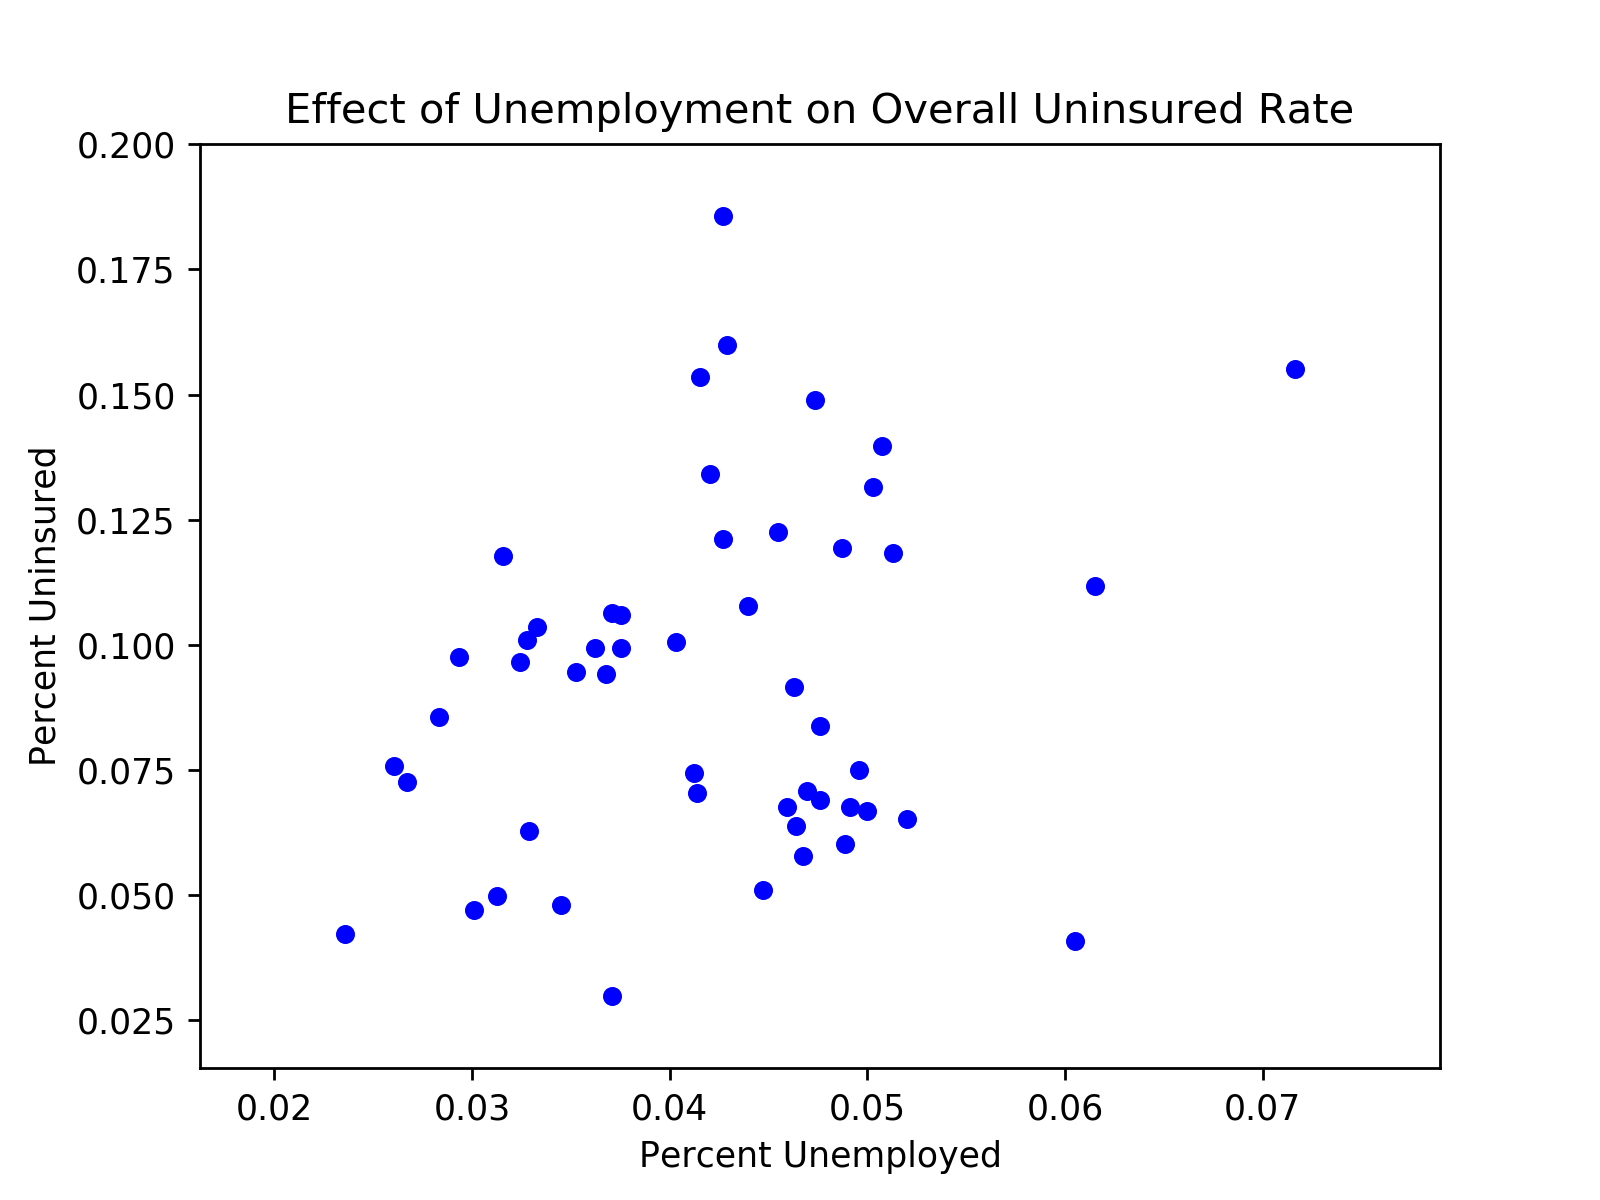

In [269]:
state2 = state.copy()

#Employment as a factor of health care access:

#scatter plot: unemployment -> uninsured rate 
state2.plot (kind ="scatter",
             x = "Percent Unemployed", 
             y = "Percent Uninsured", 
             color = "blue", 
             title = "Effect of Unemployment on Overall Uninsured Rate")



In [270]:
plt.savefig("SCATTER PLOT - Effect of Unemployment on Overal Uninsured Rates")

<IPython.core.display.Javascript object>


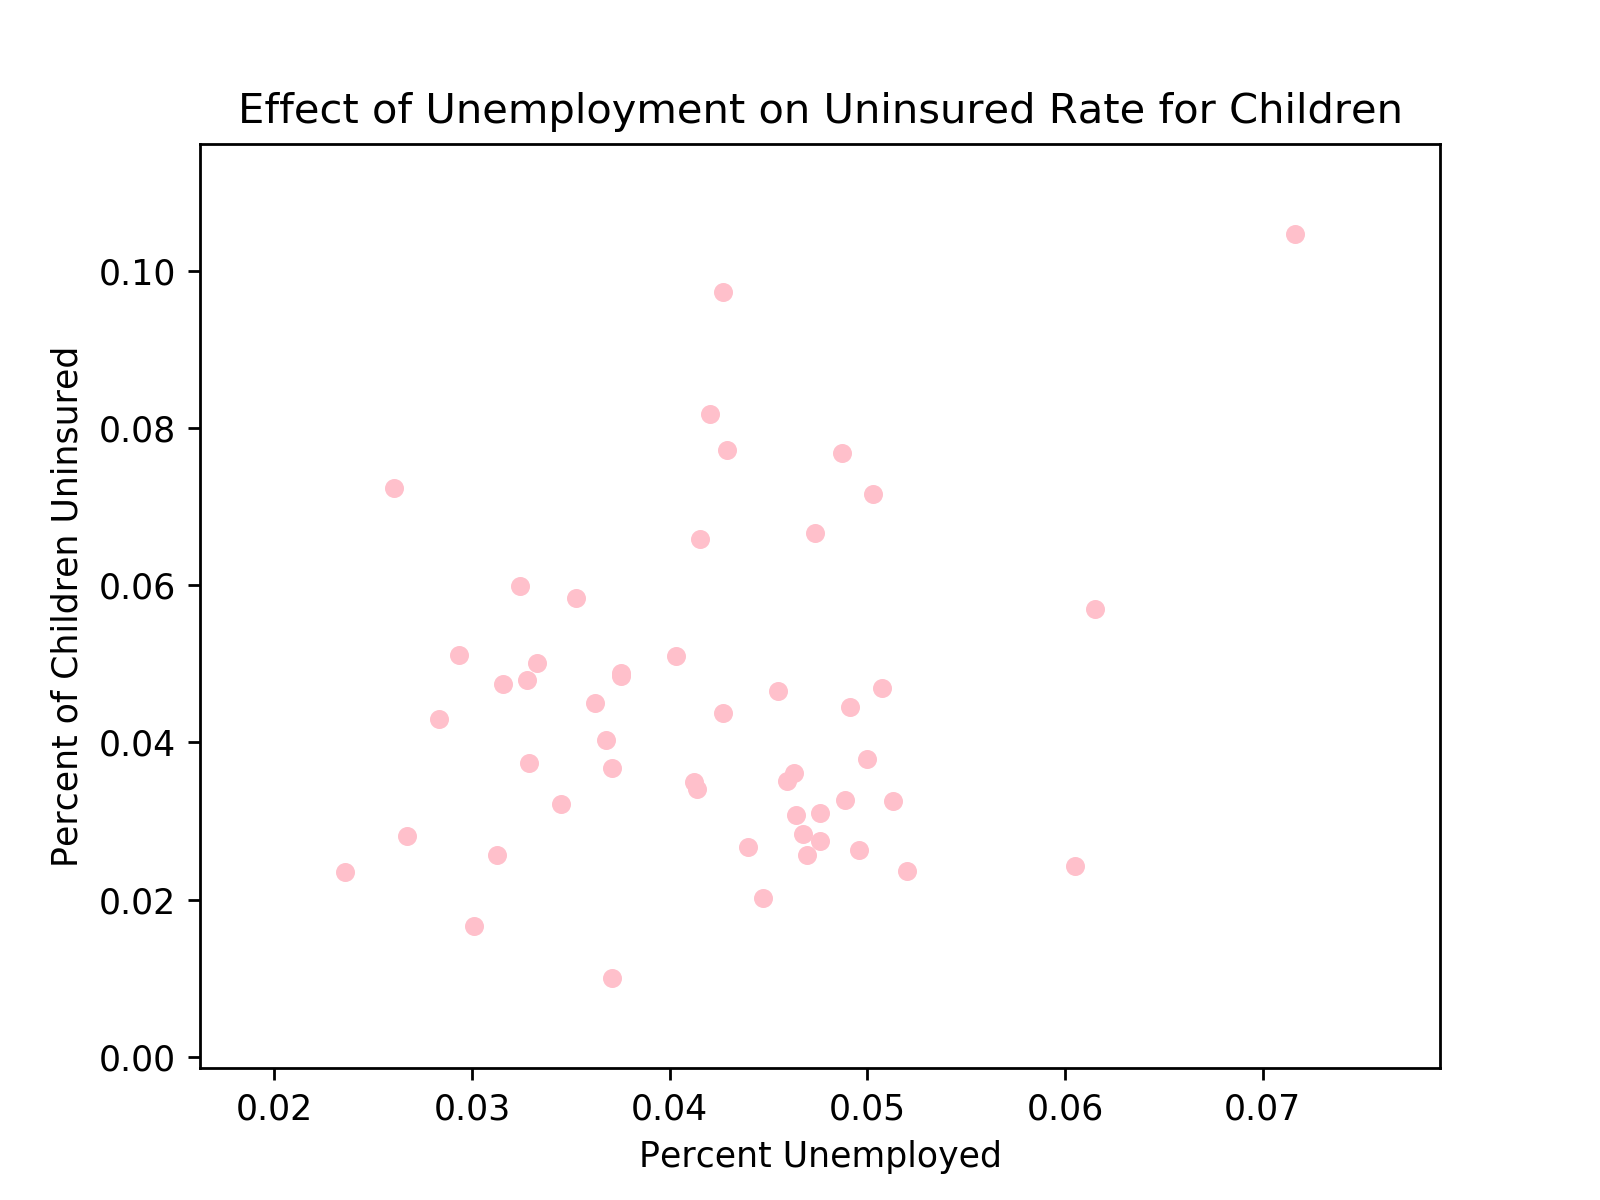

In [271]:
#scatter plot: unemployment -> uninsured number (children)
state2.plot (kind ="scatter",
             x = "Percent Unemployed",
             y = "Percent of Children Uninsured",
             color = "pink",
             title = "Effect of Unemployment on Uninsured Rate for Children")


In [272]:
plt.savefig("SCATTER PLOT - Effect of Unemployment on Children")

<IPython.core.display.Javascript object>


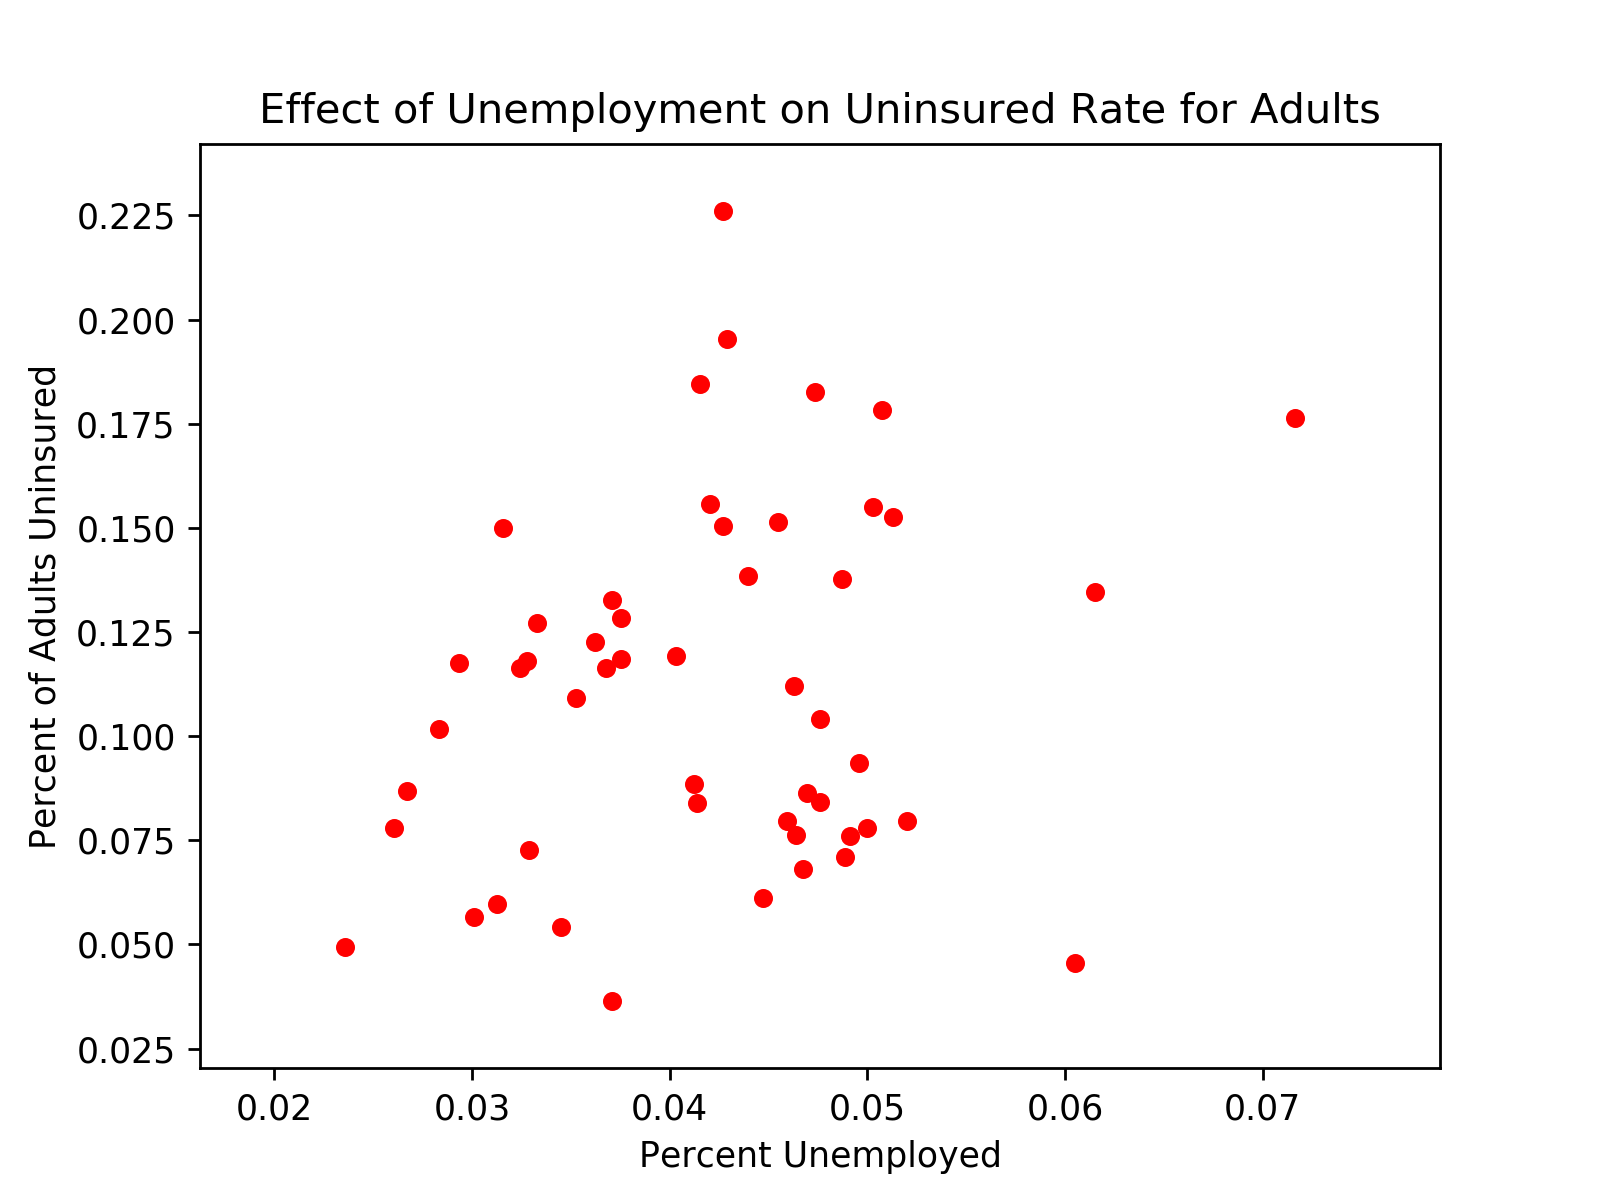

In [273]:
#scatter plot: unemployment -> uninsured rate (adults)
state2.plot (kind ="scatter",
             x = "Percent Unemployed",
             y = "Percent of Adults Uninsured",
             color = "red",
             title = "Effect of Unemployment on Uninsured Rate for Adults")

In [274]:
plt.savefig("SCATTER PLOT - Effect of Unemployment on Adults")

In [275]:
state2.columns
uninsured_rates1 = state2[["Percent Unemployed","Percent Uninsured"]]


uninsured_rates2 = state2[["Percent Unemployed","Percent of Adults Uninsured"]]


uninsured_rates3 = state2[["Percent Unemployed","Percent of Children Uninsured"]]
uninsured_rates.head()


uninsured_rates1 = uninsured_rates1.astype(float)
uninsured_rates2 = uninsured_rates2.astype(float)
uninsured_rates3 = uninsured_rates3.astype(float)

uninsured_rates1 = uninsured_rates1.sort_values(by=["Percent Unemployed"], ascending=True)
uninsured_rates2 = uninsured_rates2.sort_values(by=["Percent Unemployed"], ascending=True)
uninsured_rates3 = uninsured_rates3.sort_values(by=["Percent Unemployed"], ascending=True)


<IPython.core.display.Javascript object>


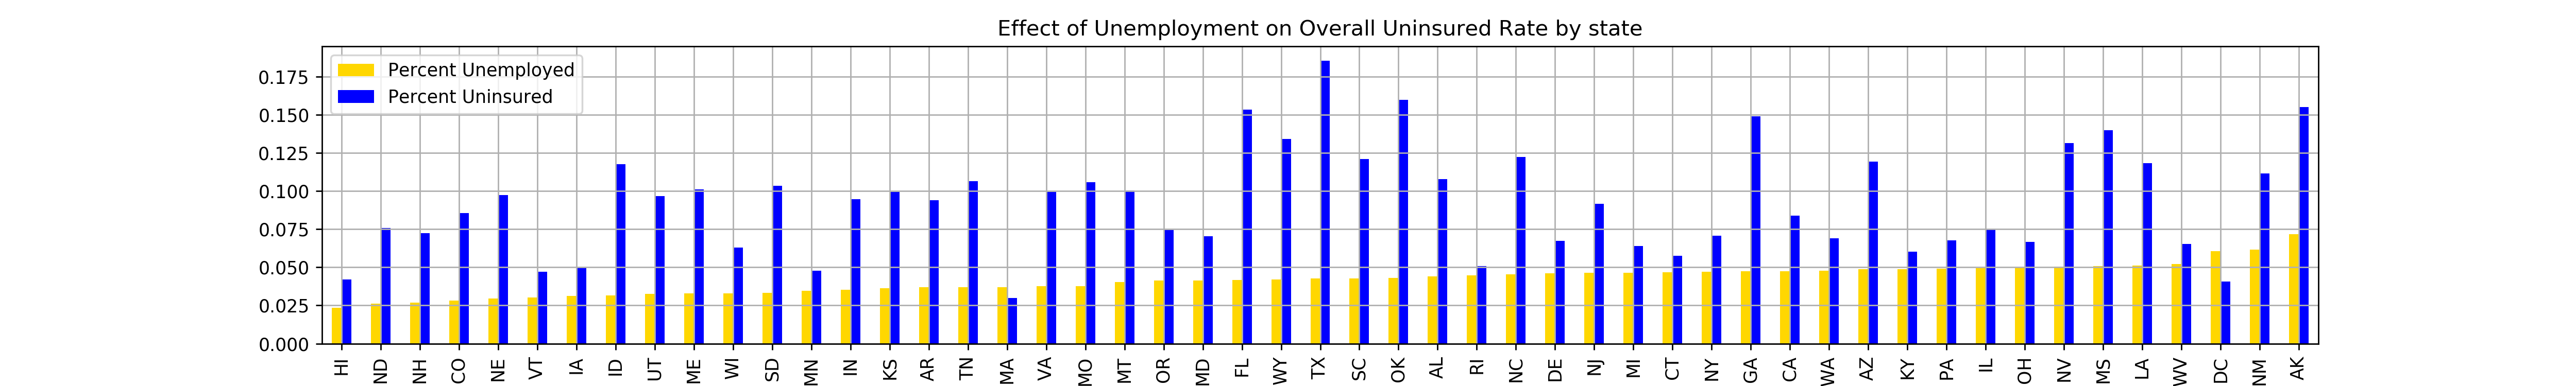

In [276]:
# Use DataFrame.plot() in order to create a bar chart of the data
uninsured_rates1.plot(kind="bar", figsize=(20,3), 
                      color=["gold","blue"], 
                      title = "Effect of Unemployment on Overall Uninsured Rate by state")
plt.grid()

In [277]:
plt.savefig("BAR Percent Unemployed & Percent Uninsured")

<IPython.core.display.Javascript object>


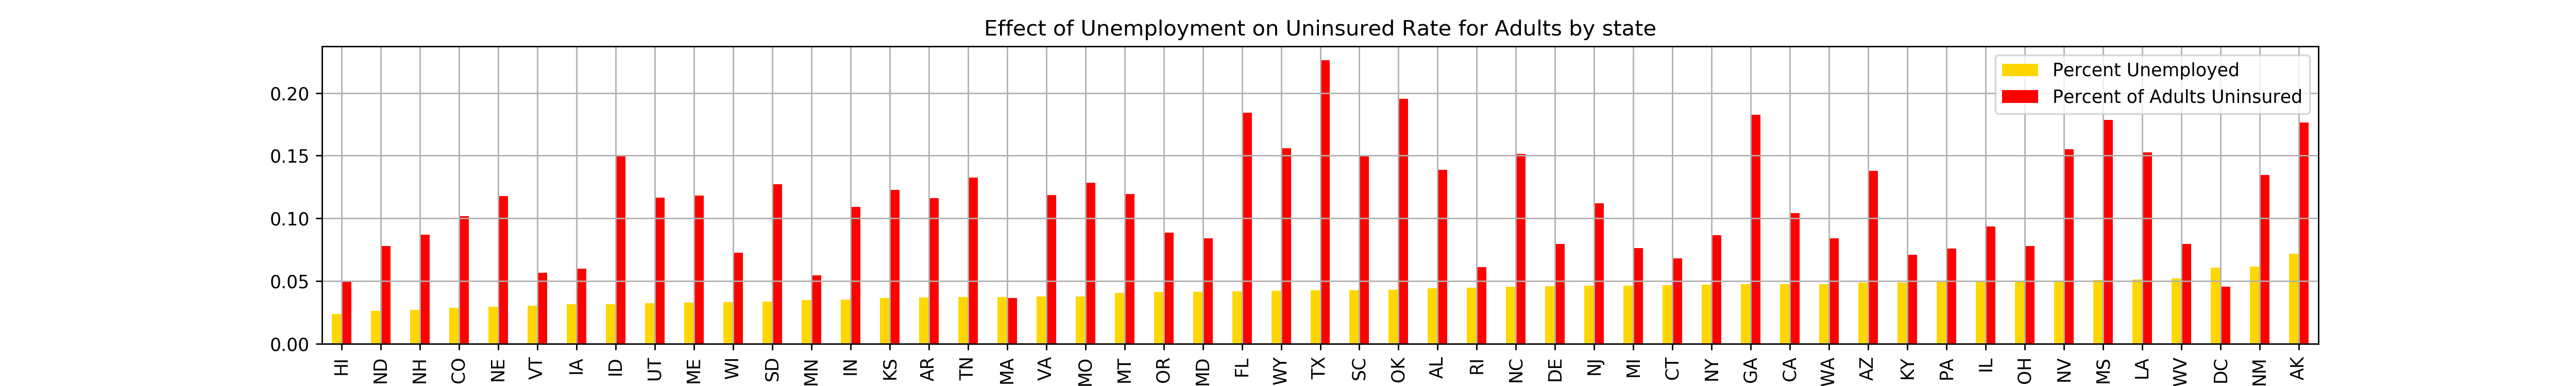

In [278]:
uninsured_rates2.plot(kind="bar", figsize=(20,3),
                      color=["gold","red"], 
                      title = "Effect of Unemployment on Uninsured Rate for Adults by state")

plt.grid()

In [279]:
plt.savefig("BAR Percent Unemployed & Percent Uninsured of Adults")

<IPython.core.display.Javascript object>


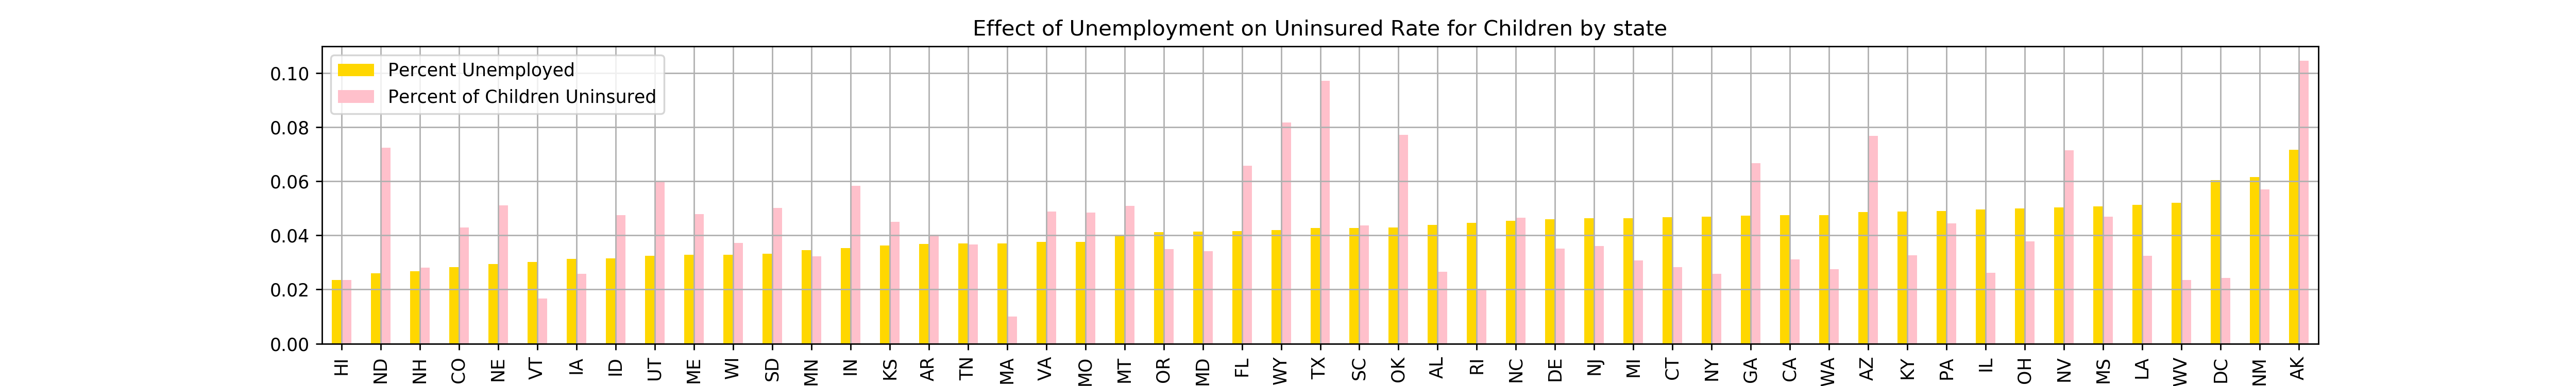

In [280]:
uninsured_rates3.plot(kind="bar", figsize=(20,3), 
                      color=["gold","pink"],
                      title = "Effect of Unemployment on Uninsured Rate for Children by state")
plt.grid()

In [281]:
plt.savefig("BAR Percent Unemployed & Percent Uninsured of Children")

In [282]:
regression = stata.ols(formula = 
                        "Uninsured_Adults_Perc ~ Unemployment_Perc"
                        ,data = state).fit()
regression.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Uninsured_Adults_Perc   R-squared:                       0.053
Model:                               OLS   Adj. R-squared:                  0.034
Method:                    Least Squares   F-statistic:                     2.743
Date:                   Sun, 16 Jun 2019   Prob (F-statistic):              0.104
Time:                           22:29:13   Log-Likelihood:                 89.708
No. Observations:                     51   AIC:                            -175.4
Df Residuals:                         49   BIC:                            -171.6
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0675      0.027      2.489      0.016       0.013       0.122
Unemployment_Perc     1.0452      0.631      1.656      0.104      -0.223       2.313
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                1.165
Skew:                           0.347   Prob(JB):                        0.559
Kurtosis:                       2.744   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [283]:
regression1 = stata.ols(formula = 
                        "Uninsured_Adults_Perc ~ Unemployment_Perc"
                        ,data = state).fit()
regression1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Uninsured_Adults_Perc   R-squared:                       0.053
Model:                               OLS   Adj. R-squared:                  0.034
Method:                    Least Squares   F-statistic:                     2.743
Date:                   Sun, 16 Jun 2019   Prob (F-statistic):              0.104
Time:                           22:29:15   Log-Likelihood:                 89.708
No. Observations:                     51   AIC:                            -175.4
Df Residuals:                         49   BIC:                            -171.6
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0675      0.027      2.489      0.016       0.013       0.122
Unemployment_Perc     1.0452      0.631      1.656      0.104      -0.223       2.313
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                1.165
Skew:                           0.347   Prob(JB):                        0.559
Kurtosis:                       2.744   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [284]:
regression2 = stata.ols(formula = 
                        "Uninsured_Children_Perc ~ Unemployment_Perc"
                        ,data = state2).fit()
regression2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Uninsured_Children_Perc   R-squared:                       0.034
Model:                                 OLS   Adj. R-squared:                  0.015
Method:                      Least Squares   F-statistic:                     1.742
Date:                     Sun, 16 Jun 2019   Prob (F-statistic):              0.193
Time:                             22:29:18   Log-Likelihood:                 127.92
No. Observations:                       51   AIC:                            -251.8
Df Residuals:                           49   BIC:                            -248.0
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0278      0.013      2.172      0.035       0.002       0.054
Unemployment_Perc     0.3937      0.298      1.320      0.193      -0.206       0.993
==============================================================================
Omnibus:                        5.495   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.024
Skew:                           0.769   Prob(JB):                       0.0811
Kurtosis:                       3.035   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [285]:
regression3 = stata.ols(formula = 
                        "Uninsured_Perc ~ Unemployment_Perc"
                        ,data = state).fit()
regression3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Uninsured_Perc   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     2.900
Date:                Sun, 16 Jun 2019   Prob (F-statistic):             0.0949
Time:                        22:29:19   Log-Likelihood:                 100.69
No. Observations:                  51   AIC:                            -197.4
Df Residuals:                      49   BIC:                            -193.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0561      0.022      2.565      0.013       0.012       0.100
Unemployment_Perc     0.8665      0.509      1.703      0.095      -0.156       1.889
==============================================================================
Omnibus:                        1.215   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                1.118
Skew:                           0.346   Prob(JB):                        0.572
Kurtosis:                       2.783   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""